```{note}
Here is a note
```

# A data science safari

The goal for today is, as the title suggests, to take a data science safari. In the spirit of a safari, you mostly want to focus on being an engaged observer. For today, we'll keep our hands inside the vehicle. The idea here is not for you to soak up all the nuances of Python syntax. Instead, just focus on two things. Note the following: 

```{note}
 - You *already* have a good intuitive understanding of all the operations you'll be seeing today (pulling out rows and columns of interest from a data table, thinking about basic summary measures like 'mean', 'max', etc). What you lack is not understanding, just a grasp of the syntax for doing things in the particular way we'll be doing them today. 
 - Even though some of the code looks pretty 'codey', it's not like we're writing thousands of lines of code. Often, we're making cool stuff happen, and pretty graphs appear with a line or two of code. 
```


# A motivating example

Let's just start by doing something cool, and we'll worry about how it works later.

Say you're a brain researcher interested in the relationship between cellular excitability (the threshold voltage at which you just start to observe spiking), and resting potential (the typical voltage that a cell hangs out at, in the absence of any stimulation). Moreover, you want to know if this relationship is different between the left and right brain hemispheres and whether this also varies between humans and mice. Here's how you would do that. 

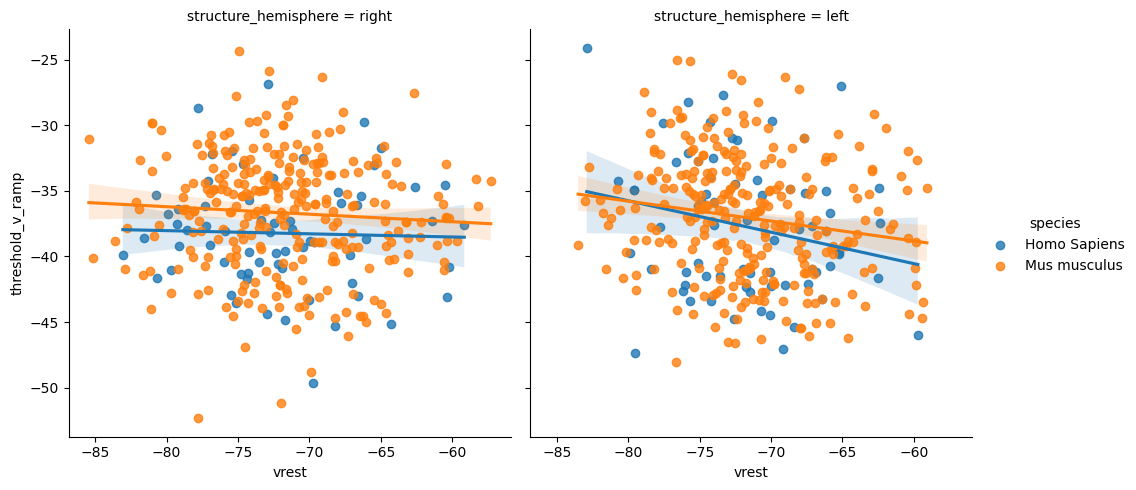

In [25]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd

from allensdk.core.cell_types_cache import CellTypesCache

ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
features = pd.DataFrame(ctc.get_all_features(require_reconstruction=True))
cell_metadata = pd.DataFrame(ctc.get_cells())

df = pd.merge(features[['vrest', 'number_branches', 'threshold_v_ramp', 'total_volume']], 
              cell_metadata[['species', 'name', 'structure_hemisphere']], 
              left_index=True, right_index=True)

sns.lmplot(data = df, x = 'vrest', y='threshold_v_ramp', hue='species', col='structure_hemisphere');

The code may look a little hairy and intimidating, but you should still find it pretty amazing that at the end of the day, there really doesn't seem to be all that much to it! In a handful of lines of code, we've: 

 - gained access to a very large and rich dataset with information about cellular properties, collected from different hemispheres and different species, for hundreds of cells.  
 
 - organized the data in such a way that we can separate them out by conditions (species, and hemisphere)
 
 - made scatterplots of the data of almost publication quality, and fit statistical models to them (trendlines w/ confidence intervals) 
 
Let's go line by line and explain what's happening, so you can learn how to start slicing and dicing data like this.

# Libraries, and APIs

The first block of code looks like this: 

In [26]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd

from allensdk.core.cell_types_cache import CellTypesCache

Hopefully you have intuited that some stuff is being imported here. But what does that mean? 

Whenever we open a notebook like this one, we can start typing Python code and running it. We might want to just do some simple calculations: 

In [29]:
a = 5
b = 6
c = a + b
print(c)

11


Or maybe we want to use a simple mathematical function, like calculate the absolute value of a number. Recall that a function is something like a little machine that you feed an input (typically the input is put inside parentheses), and which spits back an output. 

In [28]:
abs(-5)

5

That example is perhaps a bit trivial, but it's very easy to cook up examples that are less so. Say you wanted to know how to write the number 34291 in binary. The function 'bin' does exactly that. You feed it a base ten number, and it spits back that same number in binary. 

In [30]:
bin(34291)

'0b1000010111110011'

## Seaborn

But now say you wanted a function that you feed data from a table, and which aggregates the data into different user-specified groups, performs a linear regression on each group, and spits back a nicely formatted graph. That's a tall order, and that functionality is not built into basic Python. It would actually be pretty weird if it were. Luckily for us though, someone *has* written exactly that function, has been generous enough to share it with us, and has made it very easy for us to access it. Not only that, they have actually written a whole *library* of related functions that we can access. 

That library is called 'Seaborn', and when we type the command

In [31]:
import seaborn as sns

we are making Seaborn and all of its functions available to us. The 'as sns' is a way of letting Python know when we are trying to execute onf of the seaborn functions. For example, seaborn has a function named 'heatmap' that color-codes a data table so you can quickly spot relationships that are less obvious from just staring at a table of numbers. If we naively tried to call it like this: 

In [40]:
heatmap(df[['vrest', 'threshold_v_ramp']])

NameError: name 'heatmap' is not defined

Then python will yell at us. We need to be a bit more explicit, and let it know that we're calling a function from seaborn. This is how we do it: 

<AxesSubplot: >

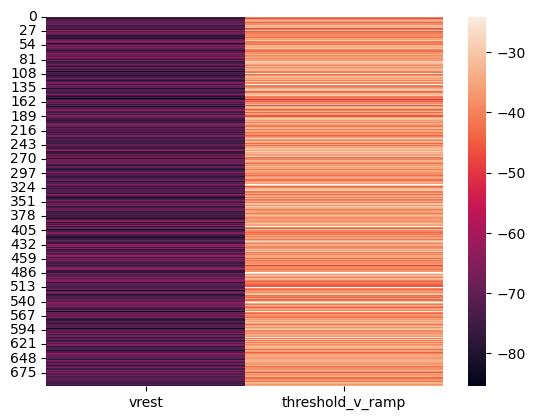

In [41]:
sns.heatmap(df[['vrest', 'threshold_v_ramp']])

We're now in a position to make a bit more sense of this line of code, from above:

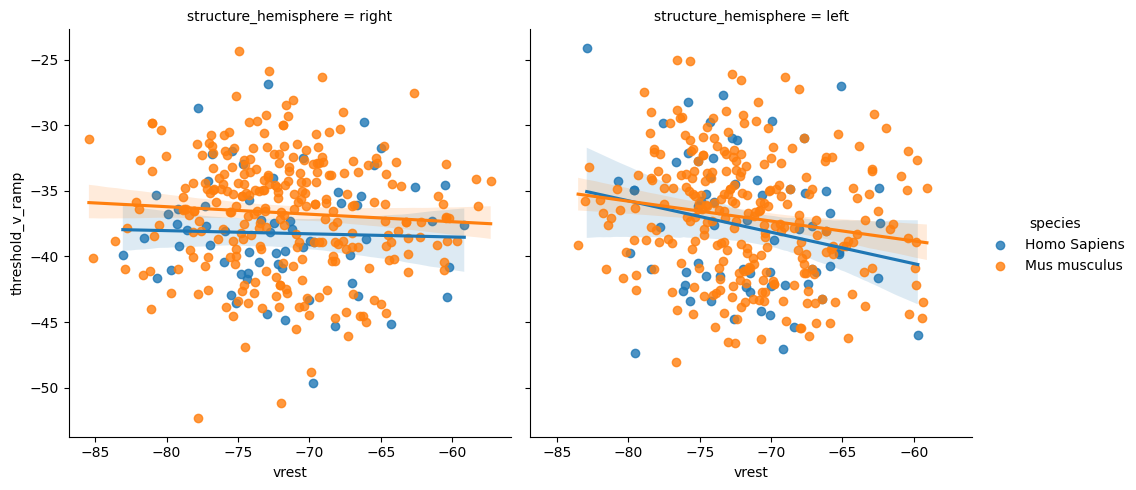

In [43]:
sns.lmplot(data = df, x = 'vrest', y='threshold_v_ramp', hue='species', col='structure_hemisphere');

We are executing a Seaborn function called lmplot (a 'linear model' plot), and unlike the other functions we've encountered above, you can see that we actually have to feed it not just one input (called a parameter), but several. These control the behavior of the function, and determine what exactly is calculated and shown. We won't go into what these parameters are doing in detail here, because there are some other concepts we need to develop first. Just make sure you have internalized the big ideas: 

 - functions do useful things (calculate square roots, produce graphs, etc) 
 - python has some functions that are built in, but quite often we need to import them from other libraries
 - functions take a variety of inputs that control their behavior. 

## Numpy

You'll notice that seaborn was just one of several libraries we imported. Also along for the ride were: 

 - **numpy:** a library with powerful computing tools, and which is especially good for working with arrays (tables of numbers, for our purposes)
 - **pandas:** a library for the manipulation and analysis of tabular data (where each row is an object, and each column is a different measurement made of that object) 
 - **matplotlib:** a library for making professional quality graphs and plots. 

After importing numpy (which we've done above, and won't repeat here), we can create simple arrays as follows: 

In [45]:
a = np.array([1,2,2,2,3,4])
a

array([1, 2, 2, 2, 3, 4])

Not terribly exciting. But what's cool is that we can call numpy functions directly on this new array, using a syntax like this: 

In [47]:
a.shape

(6,)

If we wanted to find the unique items in the array, we could do something like: 

In [48]:
np.unique(a)

array([1, 2, 3, 4])

Numpy is a really extensive library, and we won't be going that deep into it, but a few example will help give a bit of its flavor. We can do things like: 

### 1) make an array of random numbers

In [53]:
rnd = np.random.rand(1,10)
rnd

array([[0.13778182, 0.48626575, 0.08540665, 0.45892845, 0.9274585 ,
        0.16077896, 0.17336873, 0.01512331, 0.27846253, 0.66425606]])

Note that here, we couldn't just call the function rand(). We had to call it as np.random.rand(). That's because numpy is broken up into a number of different *modules*, of which rand is one. You can think of a module as a name for grouping related sets of functions. For example, there's also np.linalg, which contains functions for doing linear algebra, and np.matlib, which has functions for a wide variety of matrix operations. 

### 2. make a 1 x 10 array of ones, and reshape it into a 5 x 2 array.

In [61]:
ones = np.ones((1,10))
print(ones)
ones_reshaped = ones.reshape((5,2))
print('\n',ones_reshaped)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


### 3. take 'slices' of an array:

In [87]:
arr = np.array((['a', 'b', 'c', 'd'], ['e', 'f', 'g', 'h']))
print(arr)
arr_slice = arr[1, 2]
print('\n', arr_slice)

[['a' 'b' 'c' 'd']
 ['e' 'f' 'g' 'h']]

 g


Above, we've grabbed a single entry from the array named (uncreatively) 'arr'. The '1' indicates that we want the first *row*, and the '2' indicates that we want the second *column*. You might be wondering "isn't the item in the first row and second column 'b' and not 'g'"? The answer is 'yes', but the indexing of rows and columns actually starts with zero, not one in python. 'a', for example, would be in the zeroth row, and the zeroth column. 

You might also be interested in grabbing subsets of an array, like all the columns at a particular row. Here, the colon (:) operator comes in handy: 

In [89]:
arr[1,:]

array(['e', 'f', 'g', 'h'], dtype='<U1')

In [ ]:
The notation is just saying "grab me everything in row 1" 

### 4. find locations in an array where a certain condition is met

In [91]:
# Make an array w/ 100 random numbers uniformly distributed between 0 and 1
arr2 = np.random.rand(100)

In [95]:
# Fine the indices where a certain condition is met
idx = np.where(arr2 > 0.9)
idx

(array([10, 12, 24, 30, 43, 44, 51, 52, 60, 65, 85]),)

In [96]:
arr2[idx]

array([0.99340462, 0.98708416, 0.92635883, 0.95902238, 0.95837603,
       0.99989267, 0.94642556, 0.91902474, 0.99288174, 0.98322998,
       0.954065  ])

In the first blocks of code we made an array of 100 numbers, chosen from a uniform distribution between 0 an 1. In the second block of code, we 'asked' "find me the indices where the numbers from the array are greater than 0.9" (incidentally, we expect about 10 of these if each number is chosen at rantom from 0 to 1). Recall that the index values run from 0 to 99, not from 1 to 100. In the last block of code, we're saying "give me the values of the array at those indices I specified above". 

### 5. A more realistic example

To give a somewhat more realistic example of how you might use numpy, let's ask a question about some real data. The data we imported at the very beginning was a big table of cells x features, and among the features were the surface area of the soma (called 'soma_surface' in the table), and the resting membrane potential (called 'vrest' in the table). 

Let's make an array with those two measurements as the columns. Don't worry too much about the syntax in this part: 

In [104]:
arr3 = features[['soma_surface', 'vrest']].to_numpy()
arr3

array([[ 444.24748417,  -73.5533905 ],
       [1997.53430391,  -73.05659485],
       [ 522.95235573,  -75.32037354],
       ...,
       [ 148.86659196,  -69.29812622],
       [ 529.31181292,  -75.97226715],
       [ 529.31181292,  -75.97226715]])

The numbers in the left column look like reasonable surface areas (in square microns), and those in the right are reasonable resting potentials (in millivolts).

I could easily calculate the mean resting potential across all of these cells with a command like: 

In [106]:
arr3[:,1].mean()

-71.70170455040163

Cool. Now let's say our friend tells you that cells with a surface area between 400 and 600 have slightly higher than average resting potentials. We have the data and the tools to investigate this, and we just need to think clearly about what exactly our task is, and what steps are involved: 

- **STEP 1:** Find the index values of where a certain condition is met on column 0 (the surface areas).
- **STEP 2:** Grab resting potential data from *those same indices* where the condition is met.
- **STEP 3:** Compute the mean of that subset of the resting potential data we got from (2). 

Let's turn these steps into code! 

In [129]:
# STEP 1. Find the index values where our condition is met. 
idx = np.where((arr3[:,0] > 400) & (arr3[:,0] < 600))
idx

(array([  0,   2,   6,  11,  12,  14,  16,  18,  24,  25,  38,  44,  46,
         50,  61,  65,  72,  73,  75,  80,  87,  88, 101, 104, 109, 123,
        131, 141, 143, 149, 153, 163, 177, 181, 183, 187, 191, 194, 199,
        201, 203, 207, 208, 212, 215, 217, 239, 241, 243, 262, 263, 264,
        266, 269, 270, 271, 275, 292, 303, 307, 316, 320, 331, 335, 337,
        347, 357, 365, 366, 369, 374, 379, 384, 392, 393, 405, 406, 407,
        411, 413, 415, 422, 425, 432, 434, 437, 439, 446, 449, 451, 452,
        453, 458, 465, 468, 472, 473, 474, 478, 483, 486, 489, 501, 504,
        517, 518, 528, 536, 539, 554, 562, 567, 568, 580, 593, 594, 609,
        616, 619, 621, 622, 624, 628, 629, 632, 634, 638, 643, 645, 648,
        651, 655, 657, 667, 669, 682, 684, 685, 691, 693, 695, 699, 700]),)

Here we're using our .where() trick like before, but I've snuck a bit of extra syntax in here on you. The expression inside the parentheses is actually a combination of two conditions: both greater than 400, AND less than 600. The symbol '&' can literally be read as the familar 'and' 

In [118]:
# STEP 2. Find values of column 1 (the resting potentials) at those same indices: 
voltages = arr3[idx,1]
voltages

array([[-73.5533905 , -75.32037354, -80.50551605, -71.82261658,
        -80.40293121, -64.99478149, -76.3922348 , -72.38851166,
        -76.20173645, -74.57707977, -73.15476227, -72.16624451,
        -73.97957611, -77.62200928, -58.16283417, -75.26003265,
        -69.46669006, -69.12715149, -71.71974182, -76.71603394,
        -75.64860535, -75.77318573, -67.52542114, -83.07128906,
        -74.23421478, -72.70735931, -72.15679932, -64.28223419,
        -80.59257507, -74.09919739, -75.51889801, -73.39523315,
        -69.40285492, -71.615448  , -68.47377777, -65.85975647,
        -71.49372864, -72.67240906, -72.57830048, -70.40683746,
        -77.1328125 , -63.13568115, -67.58250427, -69.900383  ,
        -70.0072403 , -72.07157898, -60.46131897, -72.85210419,
        -80.70819855, -66.16799164, -71.17376709, -73.03672028,
        -74.17292786, -83.62197113, -71.32830048, -64.44219208,
        -60.47087479, -72.23789978, -78.07501221, -72.20556641,
        -72.7064743 , -69.91544342, -71.

In [119]:
# STEP 3: Fine the mean of those values
voltages.mean()

-71.8146886758871

Looks like your friend was wrong! A voltage of -71.814.... isn't meaningfully different from -71.7017...

### 6. Using functions to generalize a procedure

Say you wanted to re-run your procedure above, but now test whether resting potentials are different for soma sizes in the range of 1000 to 1400. It would be easy enough to go through the code, and tweak the some size ranges to run that particular query. But it would be even cooler if we could make *our own function* that allowed us to set arbitrary soma size ranges, and which spat back to us the mean resting potential of cells in that size range. In other words, we desire a syntax like: 

get_conditional_vrest(array, lower_size_limit, upper_size_limit)

If such a function existed, we would expect that if we ran this: 

get_conditional_vrest(arr3, 400, 600)

It should then spit back -71.8146886758871

Here's how you would make that thing:

In [122]:
def get_conditional_vrest(arr, lower_size_limit, upper_size_limit):
    idx = idx = np.where((arr[:,0] > lower_size_limit) & (arr[:,0] < upper_size_limit))
    voltages = arr[idx,1]
    mean_voltage = voltages.mean()
    return mean_voltage

Let's test its behavior:

In [125]:
get_conditional_vrest(arr3, 400, 600)

-71.8146886758871

Cool! What's nice is that we now have a flexible function that let's us query the data, without having to laboriously tweak numbers inside blocks of code. This use case is naturally a little bit contrived, and honestly it wouldn't be all *that* terrible to do these little tweaks. But hopefully you see the value in this, when problems scale up. Whenever possible, you should try to write functions that solve problems generically. 

A couple things are worth saying about the function we designed above. 

1) In the first line, we are *defining* a function, using the keyword 'def'. The text you see in blue is the name of our function. After we make our function, we expect that we'll be able to call it by that name, in the same way that we called abs(), bin(), etc, above. 

2) Inside the parenthesis on the first line are the *parameters* of the function. They are the things we expect a user will povide when they're later using the function. Note that we are not putting any *particular* values in these parameters. arr can be any array, and lower_size_limit is user-defined. 

## Pandas

The Pandas library is one of the true workhorses of data science. In this class you'll be doing much more with Pandas than with numpy. We'll have an 'all-Pandas' day where we explore this library in some detail, but for now let's just take a tour of it. 

Just like the fundamental numpy object is the array, the fundamental pandas object is something called a dataframe. We actually created a dataframe in our opening example, with the line of code that looked like this: 

In [130]:
features = pd.DataFrame(ctc.get_all_features(require_reconstruction=True))

The only thing to pay attention to here is the part that goes: pd.DataFrame(). The rest is just some bells and whistles that are specific to the dataset we're working with. When we run pd.DataFrame(), and put something into the parentheses, we're saying "turn whatever I've just fed you into a dataframe." "Or try your best to do so..." 

We can take a peek at the features dataframe with this command: 

In [131]:
features.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume
0,NaN,134.700000,22.697498,8.335459e-02,1.18768,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,581.674568,0.1144,0.1144,0.28,444.247484,False,3D Neuron Reconstruction morphology,9995.218601,16666.213729,2355.765059
1,NaN,NaN,-24.887498,-3.913630e-19,1.09984,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,391.393464,0.1144,0.1144,0.28,1997.534304,False,3D Neuron Reconstruction morphology,6533.385774,13173.179026,2962.024123
2,0.044825,91.322222,-46.761876,2.238637e-01,1.19024,3.826338,1.025363,-44.937504,-43.635419,-47.395833,...,236.976305,0.1144,0.1144,0.28,522.952356,False,3D Neuron Reconstruction morphology,2067.805445,3180.344934,460.354199
3,0.002303,8.756140,-33.787497,6.366711e-01,1.72910,16.728967,1.023988,-60.968754,-63.145835,-66.856253,...,332.948545,0.1144,0.1144,0.28,76.604264,False,3D Neuron Reconstruction morphology,3488.103438,2371.871389,129.985840
4,0.093492,112.245000,3.015000,1.500000e-01,1.10920,5.458287,1.025020,-51.062504,-57.916670,-56.531254,...,374.603996,0.1144,0.1144,0.28,77.936062,False,3D Neuron Reconstruction morphology,2977.161146,2703.134880,204.115177


Couple things to note here. First, this just sort of feels like a much more natural and familar object than a numpy array. If you squint and don't ask too many questions, it probably reminds you of something like an excel spreadsheet that you might have seen (or even made) in other classes. Each row is a given neuron, numbered 0, 1, 2, .. in the *index*, and each column is some particular thing that was measured (the neuron's average isi, it's surface area, etc). Even though the number of columns looks pretty large above, we actually have far more than what's shown. Let's see how many there are: 

In [132]:
features.columns

Index(['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id_x', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_ramp', 'slow_trough_v_short_square', 'specimen_id',
       'tau', 'threshold_i_long_square', 'threshold_i_ramp',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_ramp', 'threshold_t_short_square',
       'threshold_v_long_square', 'threshold_v_ramp',
       'thresho

Yikes! That's a lot of measurements. For our purposes, let's pare this down to just a handful of measurements so things are a little easier on the eyes (and the brain!). We can make a new dataframe from this one, with just a few specific columns selected: 

In [136]:
df = features[['vrest', 'number_branches', 'threshold_v_ramp', 'total_volume']]
df

,vrest,number_branches,threshold_v_ramp,total_volume
0,-73.553391,119,-40.416669,2355.765059
1,-73.056595,94,-39.500001,2962.024123
2,-75.320374,42,-35.208335,460.354199
3,-79.520042,53,-47.343751,129.985840
4,-81.065971,49,-44.041670,204.115177
...,...,...,...,...
696,-78.721344,58,-34.812500,438.463505
697,-73.505409,29,-37.822920,38.494166
698,-69.298126,56,-38.885419,257.901659
699,-75.972267,88,-33.729168,1262.798669


Pandas makes it very easy to size up your data, explore its different features, and see how different features relate to one another. When you first get your hands on a dataset, there's usually a few basic kinds of analyses and visualizations you're going to start with. We typically: 

1) Look at the distributions of *individual* features. We do this to get a sense of how spread out or bunched up the values are.  

2) Look at correlations and scatterplots *between* our features. This gives us a sense of whether there's a systematic relationship between variables. For example, as the number of branches in a neuron goes up, does the total volume go up as well? (That would certainly seem sensible)

3) Break up our data into groups on the basis of **categorical variables**, and see if any features vary systematically across groups. Categorical variables are basically data labels. There actually aren't any categorical variables in the example above, but we'll fix that soon!  

Let's see some simple examples of doing each of these things in practice. 

### 1. Inspecting the distributions of individual features

It's pretty straightforward to get a distribution.

<AxesSubplot: ylabel='Frequency'>

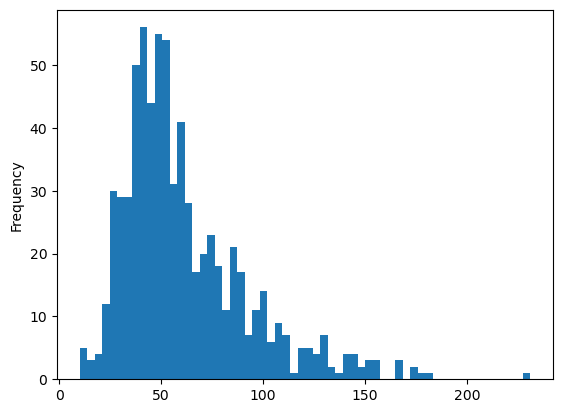

In [143]:
df['number_branches'].plot.hist(bins=60)

This quickly gives you some information about the number of branches. Most of the cells have about 50 branches, but the tail of the distribution looks like it extends pretty far to the right. It certainly doesn't look centered and symmetric like a classical normal ('bell shaped') curve. You can (and should!) look at distributions for the other three features in the data frame. 

### 2. Inspecting relationships between pairs of features. 

Looking at individual distributions will often tell you a lot, but they won't tell you about how your variables are related to one another. Is it the case that a larger resting potential implies a higher threshold? Do cells with more branches typically tend to have more surface area? 

A scatterplot is an intuitive way to size up the relationship between two variables. Here's how you make one: 

<AxesSubplot: xlabel='number_branches', ylabel='total_volume'>

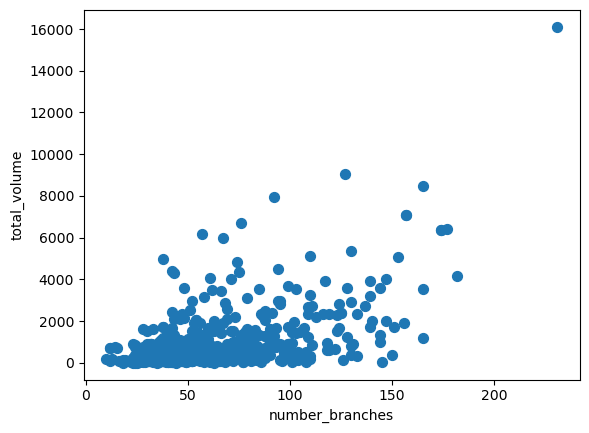

In [148]:
df.plot.scatter(x='number_branches', y='total_volume', s=50)

Perhaps there's a trend there. It might not be super strong, but I think most of us would intuit some kind of relationship. We could imagine making scatter plots like this for every pair of features (branches vs. volume, branches vs. v_rest, v_rest vs. surface area, etc, etc....). Pandas has a handy function for plotting these all in one shot, rather than requiring us to write a separate line of code of each pair. 

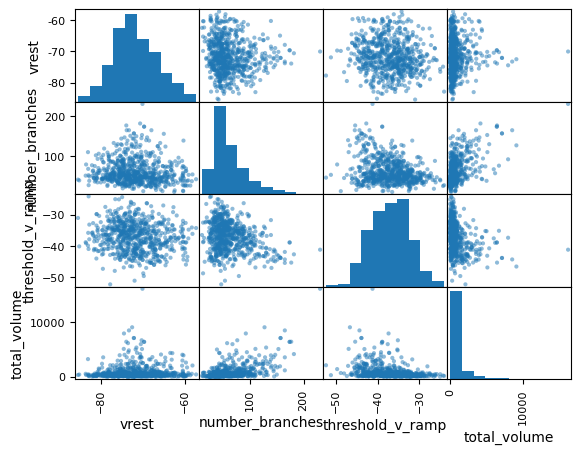

In [151]:
pd.plotting.scatter_matrix(df);

The labels are a little ugly and bunched up here, but we're not going to worry too much about that for now. The important thing is what this matrix is telling us. Basically, everywhere we see a diffuse circular cloud, we suspect there's not a systematic relationship between the variables in question. Everywhere we see the points running along the diagonal, we hypothesize a potential relationship.

What might be nice is if we could just put a single number in each box above that's representative of the overall relationship. That's exactly what we get when we compute a correlation matrix: 

In [155]:
df.corr()

,vrest,number_branches,threshold_v_ramp,total_volume
vrest,1.000000,-0.083288,-0.119154,0.060118
number_branches,-0.083288,1.000000,-0.265659,0.546804
threshold_v_ramp,-0.119154,-0.265659,1.000000,-0.297691
total_volume,0.060118,0.546804,-0.297691,1.000000


Here, values equal to 1 indicate perfect correlation. Every variable is perfectly correlated with itself, which is perhaps not terribly surprising. The number of branches and total volume also seem to be strongly correlated (0.54), which seems quite sensible. 

### 3. Breaking up data into groups.

Often, our data fall into natural groups, either by accident, or on purpose through experimental design. We might measure the heights of 100 trees, and know that each measurement corresponds to one of three types (say: elm, pine, oak). It's a natural enough question to ask: "does average height vary by type of tree?" In our neuron dataset, we might be intrested in knowing whether resting potential is different between mouse neurons vs. human neurons. Any time we're *grouping* our data, or sorting it on the basis of *kinds* or *types*, we are using what are called **categorical variables**

A categorical variable, as the name implies, denotes categories, groups, or types. If you look at the dataset again, you'll note that we actually don't have any categorical variables. 

In [158]:
df.head()

,vrest,number_branches,threshold_v_ramp,total_volume
0,-73.553391,119,-40.416669,2355.765059
1,-73.056595,94,-39.500001,2962.024123
2,-75.320374,42,-35.208335,460.354199
3,-79.520042,53,-47.343751,129.985840
4,-81.065971,49,-44.041670,204.115177


All of our data about cell type, species type, etc (those things that scream 'categorical variable!') are actually locked up in a different dataframe that we had named 'cell_metadata'

In [159]:
cell_metadata.head()

,reporter_status,cell_soma_location,species,id,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
0,None,"[273.0, 354.0, 216.0]",Homo Sapiens,525011903,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
1,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,565871768,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,None,,563340157,left,0.582057
2,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,469801138,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,None,,319194354,right,0.469578
3,None,"[69.0, 254.0, 96.0]",Homo Sapiens,528642047,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
4,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,605889373,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,None,,605622695,right,NaN


It might seem more efficient to have just packed everything into one huge dataframe with both features and metadata, but it's actually pretty common practice to split things up like this, and organize your data into a variety of different tables that all "talk to each other." 

Our life is made easy here by the fact that a given row from the 'features' table corresponds to the same row from the cell_metadata table. We'll smuggle in data from the cell_metadata table into the features table using pandas' 'merge' function. 

In [173]:
merged_df = pd.merge(df, 
                     cell_metadata[['species', 'structure_layer_name', 'disease_state']],
                     left_index=True,
                     right_index=True
                    )

merged_df

,vrest,number_branches,threshold_v_ramp,total_volume,species,structure_layer_name,disease_state
0,-73.553391,119,-40.416669,2355.765059,Homo Sapiens,3,epilepsy
1,-73.056595,94,-39.500001,2962.024123,Mus musculus,5,
2,-75.320374,42,-35.208335,460.354199,Mus musculus,4,
3,-79.520042,53,-47.343751,129.985840,Homo Sapiens,5,epilepsy
4,-81.065971,49,-44.041670,204.115177,Mus musculus,2/3,
...,...,...,...,...,...,...,...
696,-78.721344,58,-34.812500,438.463505,Mus musculus,5,
697,-73.505409,29,-37.822920,38.494166,Mus musculus,5,
698,-69.298126,56,-38.885419,257.901659,Mus musculus,2/3,
699,-75.972267,88,-33.729168,1262.798669,Mus musculus,5,


Now we're ready to rock. We can ask questions like: 'how does resting potential vary with cell layer?', or 'how does the number of branches vary by species?'. Let's take a quick peek at how many different levels (i.e. unique types) there are for each of our new categorical variables:

In [175]:
print(merged_df['species'].unique())
print(merged_df['structure_layer_name'].unique())
print(merged_df['disease_state'].unique())

['Homo Sapiens' 'Mus musculus']
['3' '5' '4' '2/3' '6a' '2' '6b' '1' '6']
['epilepsy' '' 'tumor']


Looks like the data are from one of two types of species, one of 9 types of layers, and one of three types of disease states (be careful, there's a blank middle field in the output that corresponds to no disease. You can think of that as 'control', or 'no disease'). Note that even though the cell layers have some numeric values, we are still thinking of them as categorical, and not numeric. That's because the numbers are serving as labels that aren't really carrying quantitative information. It would have been equivalent to call the cell layers "a, b, c,... etc". 

If we look at our dataframe above, we see that it comprises 701 rows. At the most granular level, there are 701 things our data are about. But we can skin that cat a lot of different ways. From another perspective, we could say that are data are 'about' two things: Mouse cells vs. Human cells. Similarly, we could say our data are 'about' three things: epileptic neurons, control neurons, and tumor neurons. 

Pandas has a nifty function called 'groupby' that lets us change what our data is about. 

In [176]:
merged_df.groupby(by=['species']).mean()

,vrest,number_branches,threshold_v_ramp,total_volume
species,,,,
Homo Sapiens,-71.791211,63.531915,-37.973826,939.751153
Mus musculus,-71.679168,60.855357,-36.868920,840.908565


The function above has, behind the scenes, grabbed all those rows of data that corresponded to mice, all those rows of data that correspond to humans, and calculated the means for all numeric variables, separately for the two categories. 

We could have also grouped the data differently, and calculated a different attribute: 

In [178]:
merged_df.groupby(by=['disease_state']).count()

,vrest,number_branches,threshold_v_ramp,total_volume,species,structure_layer_name
disease_state,,,,,,
,560,560,551,560,560,560
epilepsy,112,112,108,112,112,112
tumor,29,29,28,29,29,29


Here, we've broken things up by disease state, and have simply counted the number of cells in each group. If you add up the numbers in the first column, you'll see that they come to 701 -- our total number of cells. From this table, we can appreciate that we have by far the most data from the control group, and by far the least data from the tumor group. The reason one number looks weird (the 108 for the count of threshold_v_ramp measurements in the 'epilepsy' group) is that there were probably some missing dataa values for that measurement (maybe the recording went bad for that measurement, but they didn't want to scrap all the other great data they had collected). 

Tables are a nice way to make contrasts between groups, but often a bar-graph is the better choice. We can put our seaborn hat back on to do this:

<AxesSubplot: xlabel='species', ylabel='total_volume'>

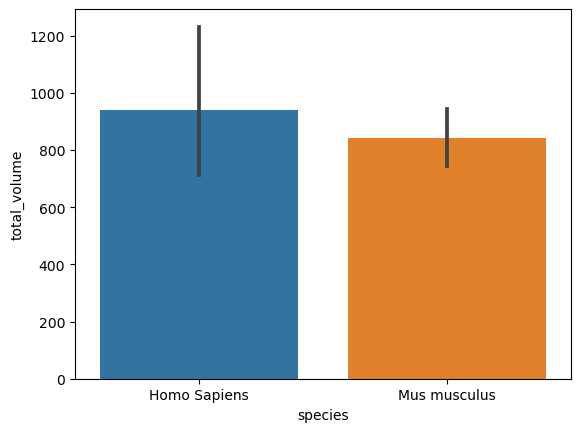

In [185]:
sns.barplot(data=merged_df, x='species', y='total_volume')

# The Allen SDK

Recall from our initial example that there was a block of code that looked something like this

In [ ]:
from allensdk.core.cell_types_cache import CellTypesCache

ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
features = pd.DataFrame(ctc.get_all_features(require_reconstruction=True))
cell_metadata = pd.DataFrame(ctc.get_cells())

This is the code that actually made the data available to us in the first place. You'll note that the top line includes the keyword 'import' that we discussed earlier. The 'from ... import' syntax is our way of indicating that we really only want a very small piece from the library we're importing from (in this case something called 'CellTypesCache'). 

But let's back up. What is allensdk? Basically, it's a set of modules that the Allen Institute has made publicly available, and which allow anyone to gain access to their data. In general, an SDK stands for software development kit. You can find details on the allen sdk here. [...]

The thing of interest to us is 'CellTypesCache', which is a module that lives under core.cell_types_cache. 

The details arent' terribly important, but just for completeness, here is what happens in the three lines of code above: 

1) A new directory is created on your computer called 'cell_types', which contains the downloaded data. 
2) A dataframe called 'features' is created, which contains all the computed cell features
3) A dataframe called 'cell_metadata' is created. 

# What you should take away: 

As a reminder, I want you to think of this as a safari. You will have a whole semester to put these ideas into practice. The more important thing is to appreciate the overall landscape. 

 - It's pretty easy to get access to big, fancy data sets (3 lines of code puts 700 cells x XX measurements on your machine!)
 - Functions are things that you feed an input, and which produce an output
 - numpy is good for working with arrays of numbers
 - seaborn makes really pretty plots, and hides a lot of details about exactly how
 - pandas lets you slice and dice data. You can merge dataframes together, and group your data in interesting ways
 

# Handy list of functions you encountered today:

abs()
bin()
& operator
import
from … import … as

sns.heatmap()
sns.lmplot()
sns.barplot

np.shape()
np.unique()
np.random.rand()
np.ones()
np.reshape()
np.where()
np.mean()

pd.DataFrame()
pd.head()
pd.plot.hist()
pd.plot.scatter()
pd.plotting.scatter_matrix()
pd.corr()
pd.merge()
pd.groupby()